#  Capstone Project 2: Stock price forecasting
# Section 3: Exploratory Data Analysis

In [104]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Coca-Cola stock

We start by importing the data we stored in a csv file:

In [105]:
# Read the csv file containing the data for the KO stock.
# index_col=0 tells pandas to use the first column as the index. 
# parse_dates=True tells pandas to interpret the index as a DateTimeIndex.
df_KO = pd.read_csv('KO.csv', parse_dates=True, index_col=0)

Let us recall what columns this dataframe has:

In [106]:
df_KO.head()

,Open,High,Low,Close,Adj Close,Volume,Reported EPS
Date,,,,,,,
1996-04-17,20.28125,20.28125,19.84375,20.03125,10.141947,8906000,0.14
1996-04-18,20.03125,20.15625,19.84375,19.87500,10.062837,9608000,0.14
1996-04-19,19.87500,20.06250,19.56250,19.68750,9.967900,13010400,0.14
1996-04-22,19.87500,20.18750,19.87500,20.15625,10.205229,7160800,0.14
1996-04-23,20.15625,20.28125,20.06250,20.25000,10.252701,6218800,0.14


The `Open` and `Close` columns display the stock prices at opening and closing time of stock market on a given date, respectively. The columns `High` and `Low` contain the highest and lowest prices of the stock on a given date. 

The `Adj Close` refers to the "Adjusted Closing Price." This is a stock's closing price on any given day of trading that has been amended to include any corporate actions that occurred at any time before the next day's open. For instance, dividends and stock splits can affect the stock price.

`Volume` refers to the number of shares traded on a given day. This is a significant metric for traders because it provides an indication of the strength or intensity behind price movements. High volume levels often signify a lot of trader interest or excitement about a stock, while low volume levels might indicate a lack of interest or awareness.

`Reported EPS` contains the last reported earnings per share (EPS). EPS is a financial metric representing the portion of a company's profit allocated to each share of a stock. It is an indicator of a company's profitability and is often considered to be one of the most important variables in determining a share’s price. 

Let's recheck that our dataframe has no null values:

In [107]:
df_KO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6724 entries, 1996-04-17 to 2022-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6724 non-null   float64
 1   High          6724 non-null   float64
 2   Low           6724 non-null   float64
 3   Close         6724 non-null   float64
 4   Adj Close     6724 non-null   float64
 5   Volume        6724 non-null   int64  
 6   Reported EPS  6724 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 420.2 KB


In the following we will choose the  `Close` column as our independent variable to model. Let us begin by plotting the `Close` stock price over the period of time contained in our dataframe.

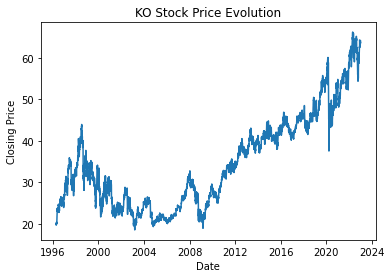

In [108]:
plt.plot(df_KO.index, df_KO['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('KO Stock Price Evolution')
plt.show()

We observe a phase of growth from 1996 to 1999 followed by a bearish trend that lasts until 2006, where a short phase of exponential growth starts and is killed by the 2008 economic crisis, with a subsequent devaluation trend until 2009. From that point to the present, the stock has experienced a general trend of growth at different rates. 

The columns `Open`, `High` and `Low` exhibit a nearly identical distribution, which signals a very high correlation between the four columns.

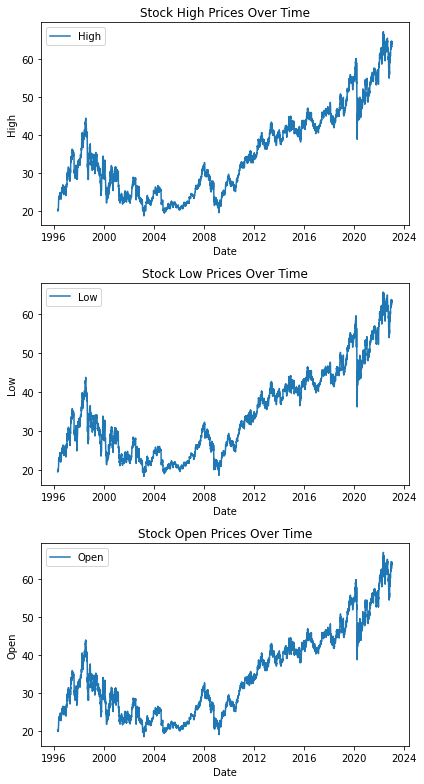

In [109]:
# Create a function to display the plots of 'Open', 'High', 'Low' and 'Close' prices.

def plot_stock_prices(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(6, 11))

    for ax, column in zip(axes, columns):
        ax.plot(df.index, df[column], label=column)
        ax.set_title('Stock ' + column + ' Prices Over Time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot the 'High', 'Low' and 'Open' columns
columns = ['High', 'Low', 'Open']
plot_stock_prices(df_KO, columns)

For the identification of trends, bullish and bearish sings it is useful to plot the traded volume.

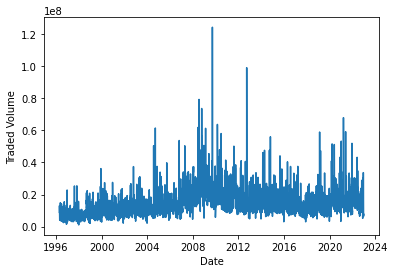

In [110]:
# Plot the 'Volume' feature over time
plt.plot(df_KO.index, df_KO['Volume'])
plt.xlabel('Date')
plt.ylabel('Traded Volume')
plt.show()

In this case, we can observe for instance that the highest peak in traded volume, which occured in 2009, signals the reversal of a bearish trend to a bullish phase. 

In [113]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_KO['Reported EPS'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.7903983734620192
p-value: 0.059658435288129814


In [114]:
# interpretation

In [115]:
summary = df_KO.describe()
summary.loc['skew'] = df_KO.skew().tolist()
summary.loc['kurt'] = df_KO.kurt().tolist()
print(summary)


              Open         High          Low        Close    Adj Close  \
count  6724.000000  6724.000000  6724.000000  6724.000000  6724.000000   
mean     34.793051    35.075993    34.503185    34.801038    25.122108   
std      11.288001    11.342381    11.233800    11.286434    13.489321   
min      18.549999    18.799999    18.504999    18.535000     9.967900   
25%      24.900000    25.123750    24.678750    24.935625    14.113949   
50%      32.375000    32.688749    31.961875    32.375000    18.635020   
75%      42.580002    42.889999    42.270000    42.560001    33.858791   
max      67.000000    67.199997    65.720001    66.209999    63.820396   
skew      0.645624     0.648308     0.642086     0.645716     0.990788   
kurt     -0.476626    -0.460190    -0.495373    -0.473681    -0.025704   

             Volume  Reported EPS  
count  6.724000e+03   6724.000000  
mean   1.377074e+07      0.380458  
std    7.489436e+06      0.157792  
min    1.067400e+06      0.110000  
25%  

In [116]:
# corr price earnings

A common step in the analysis of underlying patterns and behaviors of time series is the decomposition into trend, seasonality and noise. The trend component captures the underlying pattern of growth or decline in the time series data over a long period. The seasonal component captures patterns that repeat at regular intervals, such as daily, weekly, monthly, or quarterly, whereas the residual component captures the irregular fluctuations that cannot be attributed to the trend or seasonal components. 

In the case of stocks, one expects the seasonality component to be of low significance. While there might be some seasonality in stock prices due to factors like quarterly earnings reports or regular economic cycles, trends and irregular fluctuations (noise) are generally considerably more significant.

Let us perform the trend + seasonality + noise decomposition for the `Close` price of the KO stock. We use as a period the value `period=252`, namely the average number of yearly trading days in the US. 

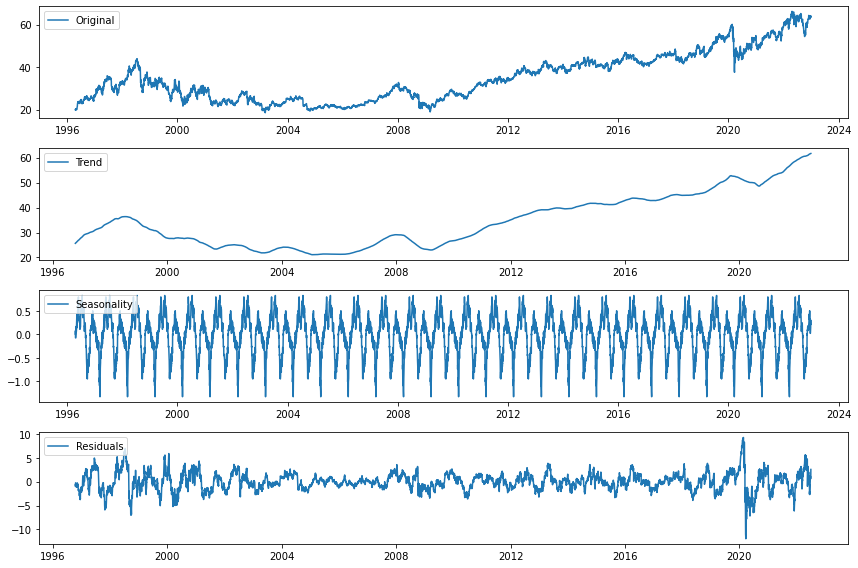

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_KO['Close'], model='additive', period=252) # Change the period according to your data's seasonality

# Plot the original time series, trend, seasonal component, and residuals 
plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(df_KO['Close'], label='Original')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residuals
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()


The plot of the trend confirms our previous insights: a bullish trend from 1996 to  1999 followed by a bearish phase until 2006, where an exponentail growth phase started and was frustrated by the 2008 banking crisis. A general trend of growth has been occuring since 2009. 
    
On the other hand, we observe that the seasonality component is not very significant in magnitude, as we expected (note that the order of magnitude of the seasonality component is around 1/100 of the stock price). We further observe that movements in stock prices related to the 2020 COVID pandemic and the 2022 Ukraine war are captured by the noise signal.

We can have a closer look at the seasonality component. Let us plot a single cycle.

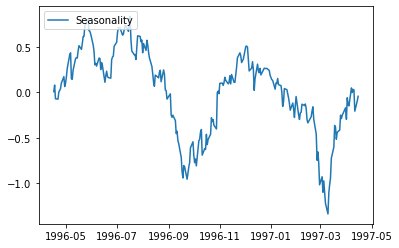

In [118]:
# Define the season length
season_length = 252

# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(result.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')


In order to check for outliers, it is useful to create a boxplot of closing prices by year:

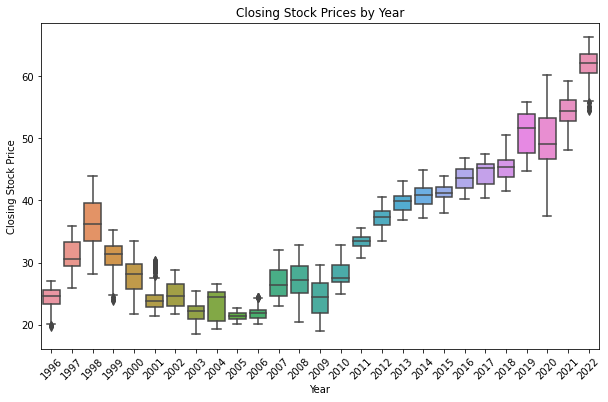

In [119]:
# Create a 'Year' column in the dataframe 'df_KO'
df_KO['Year'] = df_KO.index.year

# Create a boxplot of the closing prices by year
plt.figure(figsize=(10,6)) 
sns.boxplot(x='Year', y='Close', data=df_KO)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=45)
plt.show()

We see that only the years 1996, 1999, 2011, 2006 and 2022 have outliers. These do not deviate dramatically from the distribution, so we chooose to keep them. 

Last, we plot the histogram of the 'Close' stock price. Stock prices can be modeled as random variables, and so we can estimate a probability distribution for the histogram of stock orices at closing time. For this task we will use the Kernel Density Estimation (KDE) technique, independent of the choice of the number of bins. 

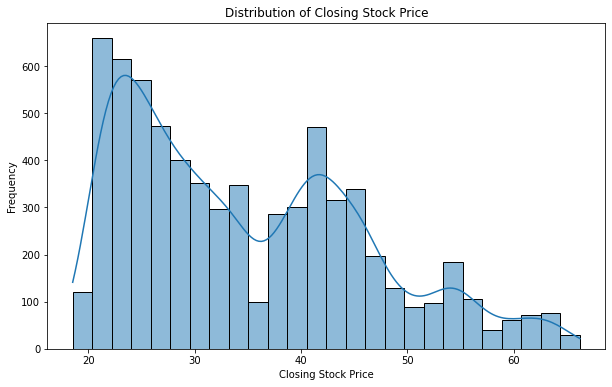

In [121]:
# Plot the histogram of the 'Close' stock price column. 
plt.figure(figsize=(10, 6))
sns.histplot(df_KO['Close'], kde=True) # 'kde=True' introduces the Kernel Density Estimation curve 
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

So far we have focused on the analysis of stock prices. Let us now turn to the reported earnings per share. The plot of the Reported EPS looks as follows:

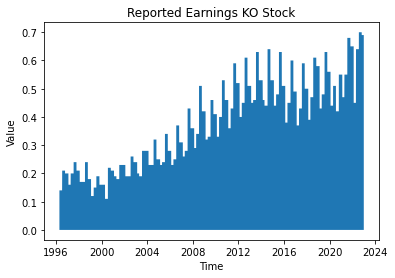

In [125]:
# Plot the 'Reported Earnings' data
plt.fill_between(df_KO.index, df_KO['Reported EPS'])
plt.title('Reported EPS KO Stock')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

We observe a general trend of growth over time with some modulation, as well as a marked seasonality signal. In order to gain a better understanding of the underlying patters, let us decompose 

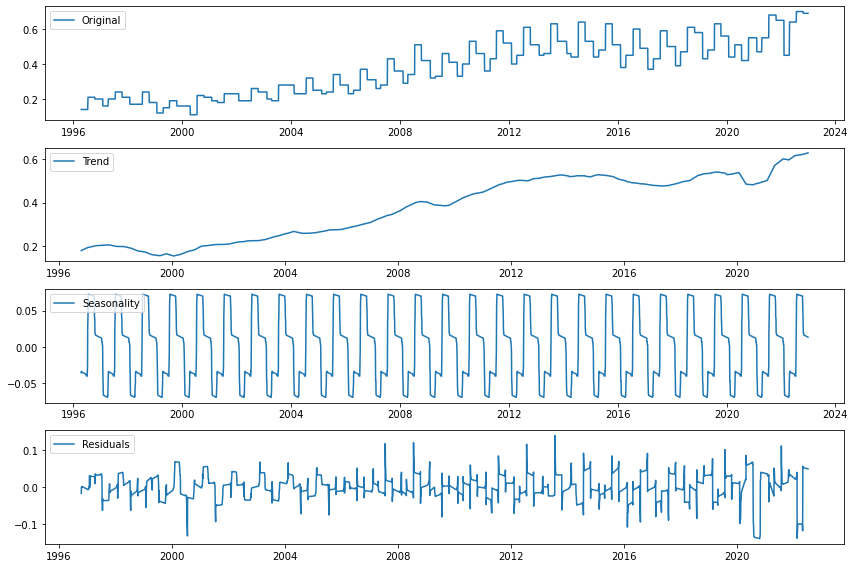

In [127]:
# Decompose the time series
result = seasonal_decompose(df_KO['Reported EPS'], model='additive', period=252) # Change the period according to your data's seasonality

# Plot the original time series, trend, seasonal component, and residuals 
plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(df_KO['Reported EPS'], label='Original')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residuals
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()

The trend plot shows indeed a growing . The order of magnitude of the seasonality signal is now only 1/10 of the trend and thus has a significant impact, as hinted before. 

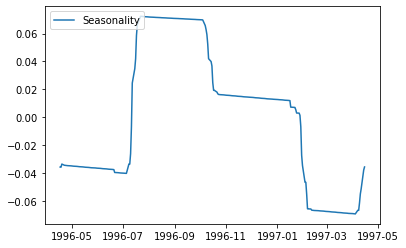

In [128]:
# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(result.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')


Finally, we investigate the correlation between the different columns in our dataframe:

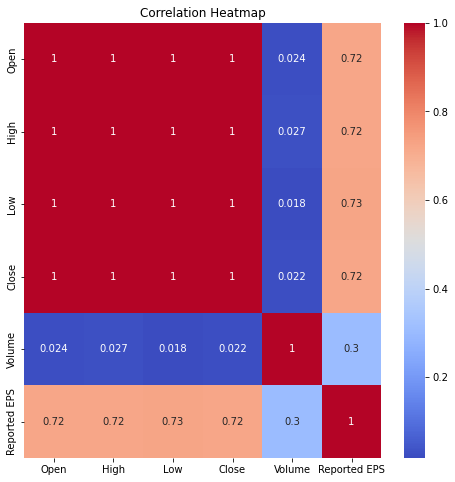

In [131]:
# Create a heatmap of the correlation between stock prices
corr = df_KO[['Open', 'High', 'Low', 'Close', 'Volume', 'Reported EPS']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The `Open`, `High`, `Low` and `Close` prices are highly correlated among themselves, as we expected from the similarity between their plots. 

There is also a significant correlation between the stock price and the `Reported EPS`. The reason for this is that the EPS is a key indicator of a company's profitability, which is one of the primary drivers of stock price.

Although the trading volume , we obtain essentially no correlation between trading volume and stock price over time. Trading volume and `Reported EPS` seem to have a little correlation. We interpret this as the fact that release of EPS data can impact trading volume. For instance, if a company reports EPS that is much higher or lower than expected, it can lead to increased trading volume as investors buy or sell the stock based on this new information.

It is also interesting to explore correlations between the KO stock prices and the S&P500. First we ned to import the S&P500 data for the same period of time comprised in `df_KO`:

In [140]:
import yfinance as yf

# Define the SP500 ticker symbol and start and end date
ticker = "^GSPC"
start_date = "1996-04-17"
end_date = "2022-12-31"

# Fetch the historical data using yfinance and store in the dataframe 'df_SP'
df_SP = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


Let's check that the dataframe `df_SP` has the correct format:

In [141]:
df_SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-04-17,645.000000,645.000000,638.710022,641.609985,641.609985,465200000
1996-04-18,641.609985,644.659973,640.760010,643.609985,643.609985,415150000
1996-04-19,643.609985,647.320007,643.609985,645.070007,645.070007,435690000
1996-04-22,645.070007,650.909973,645.070007,647.890015,647.890015,395370000
1996-04-23,647.890015,651.590027,647.700012,651.580017,651.580017,452690000


Now we compute correlations:

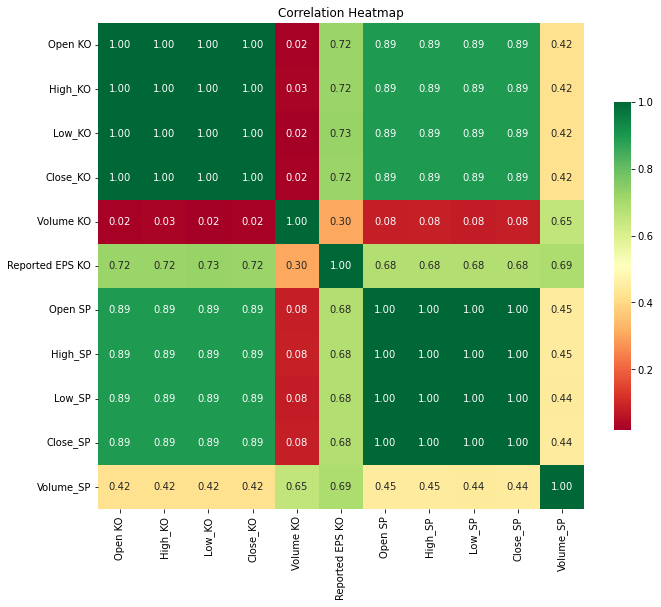

In [143]:
selected_data = pd.DataFrame({
    'Open KO': df_KO['Open'],
    'High_KO': df_KO['High'],
    'Low_KO': df_KO['Low'],
    'Close_KO': df_KO['Close'],
    'Volume KO': df_KO['Volume'],
    'Reported EPS KO': df_KO['Reported EPS'],
    'Open SP': df_SP['Open'],
    'High_SP': df_SP['High'],
    'Low_SP': df_SP['Low'],
    'Close_SP': df_SP['Close'],
    'Volume_SP': df_SP['Volume']
})

# calculate correlation matrix
corr = selected_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='RdYlGn', cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The upper left square is just the correlation heatmap we plotted previously. The off-diagonal squares includes the correlations with the S&P500 data.

We observe a high correlation between the `KO` and `S&P500` prices, and almost no correlation between the trading volume of `KO` and the `S&P500` prices. On the other hand, the correlation between the trading volume of `S&P500` and the prices of `KO` is higher, around 0.42.  There is a slight correlation of 0.65 between the trading volumes of the two tickers. The reported EPS of `KO` have a correlation with the prices of `S&P500` similar to the prices of `KO` itself.

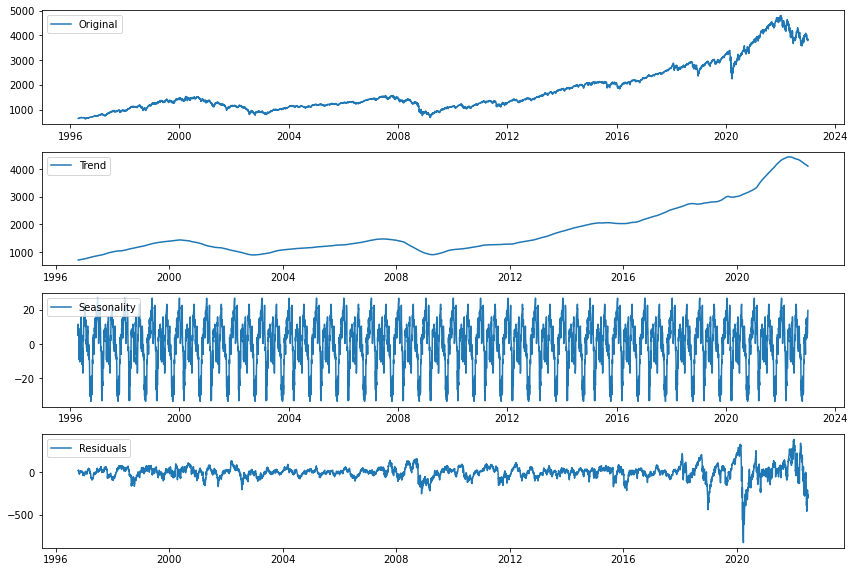

In [146]:
# Decompose the time series
result = seasonal_decompose(df_SP['Close'], model='additive', period=252) # Change the period according to your data's seasonality

# Plot the original time series, trend, seasonal component, and residuals 
plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(df_SP['Close'], label='Original')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residuals
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()

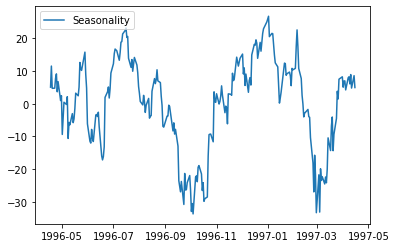

In [147]:
# Plot the seasonality component for one cycle
plt.subplot()
plt.plot(result.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')

## 2. Tesla stock

In [53]:
# Read the csv file containing the data for the KO stock.
# index_col=0 tells pandas to use the first column as the index. 
# parse_dates=True tells pandas to interpret the index as a DateTimeIndex.
df_TSLA = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)

In [54]:
df_TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,Reported EPS
Date,,,,,,,
2010-08-05,1.436000,1.436667,1.336667,1.363333,1.363333,11943000,-0.0271
2010-08-06,1.340000,1.344000,1.301333,1.306000,1.306000,11128500,-0.0271
2010-08-09,1.326667,1.332000,1.296667,1.306667,1.306667,12190500,-0.0271
2010-08-10,1.310000,1.310000,1.254667,1.268667,1.268667,19219500,-0.0271
2010-08-11,1.246000,1.258667,1.190000,1.193333,1.193333,11964000,-0.0271


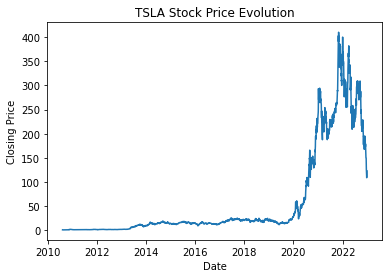

In [55]:
plt.plot(df_TSLA.index, df_TSLA['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TSLA Stock Price Evolution')
plt.show()

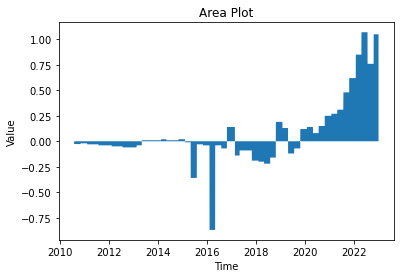

In [56]:
plt.fill_between(df_TSLA.index, df_TSLA['Reported EPS'])
plt.title('Area Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

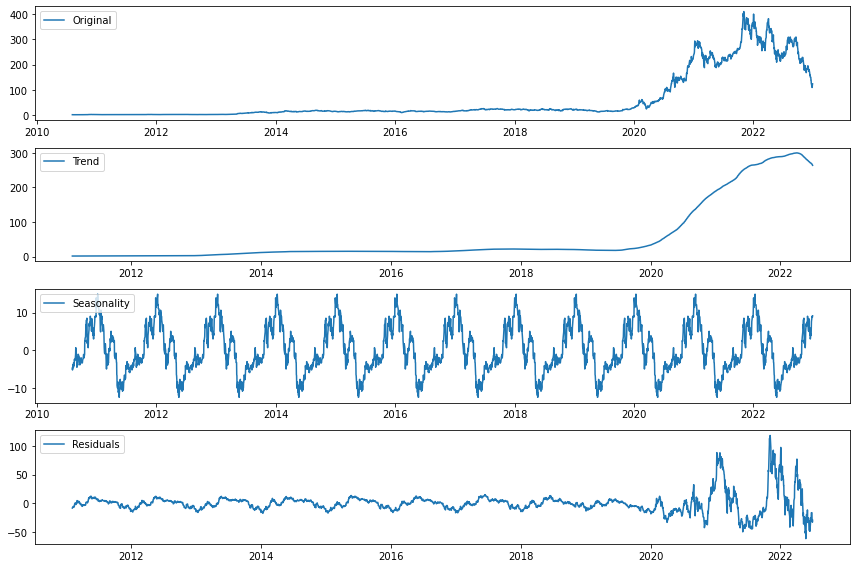

In [57]:


# Assuming df is your DataFrame and 'column_name' is the name of the column containing the time series
# Also assuming the index of df is a DatetimeIndex

# Decompose the time series
result = seasonal_decompose(df_TSLA['Close'], model='additive', period=252) # Change the period according to your data's seasonality

# Plot the original time series, trend, seasonal component, and residuals 
plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(df_TSLA['Close'], label='Original')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

# Residuals
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()


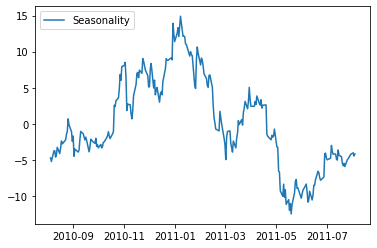

In [58]:
# Seasonality for one period
plt.subplot()
plt.plot(result.seasonal[:season_length], label='Seasonality')
plt.legend(loc='upper left')


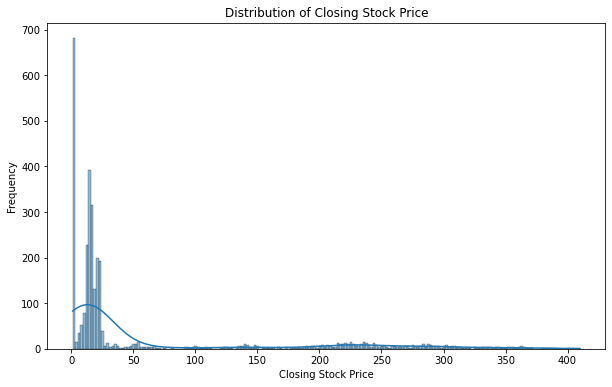

In [60]:
# Plot the histogram of the 'Close' stock price column. 
plt.figure(figsize=(10, 6))
sns.histplot(df_TSLA['Close'], kde=True) # 'kde=True' introduces the Kernel Density Estimation curve 
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

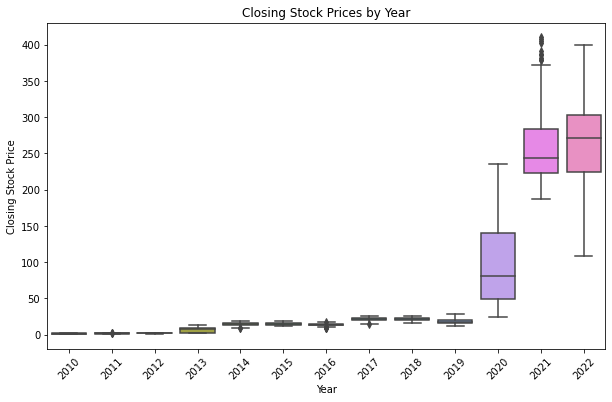

In [61]:
# Create a 'Year' column in the dataframe 'df_KO'
df_TSLA['Year'] = df_TSLA.index.year

# Create a boxplot of the closing prices by year
plt.figure(figsize=(10,6)) 
sns.boxplot(x='Year', y='Close', data=df_TSLA)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=45)
plt.show()

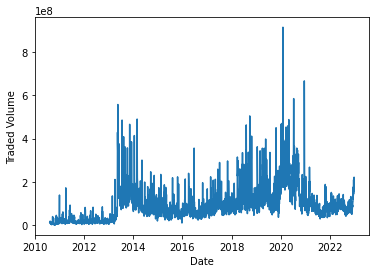

In [64]:
plt.plot(df_TSLA.index, df_TSLA['Volume'])
plt.xlabel('Date')
plt.ylabel('Traded Volume')
plt.show()

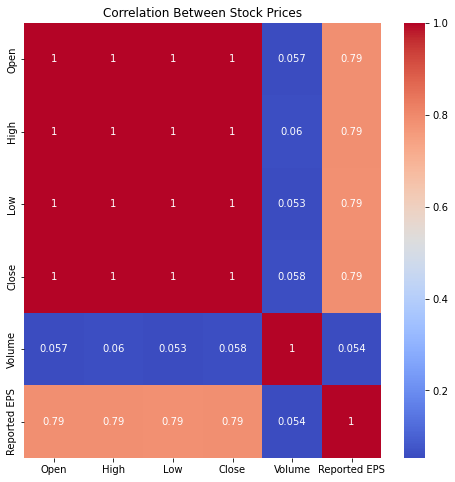

In [62]:
# Create a heatmap of the correlation between stock prices
corr = df_TSLA[['Open', 'High', 'Low', 'Close', 'Volume', 'Reported EPS']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()

In [74]:
result = adfuller(df_TSLA['Reported EPS'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.412052222634207
p-value: 0.57648468738904


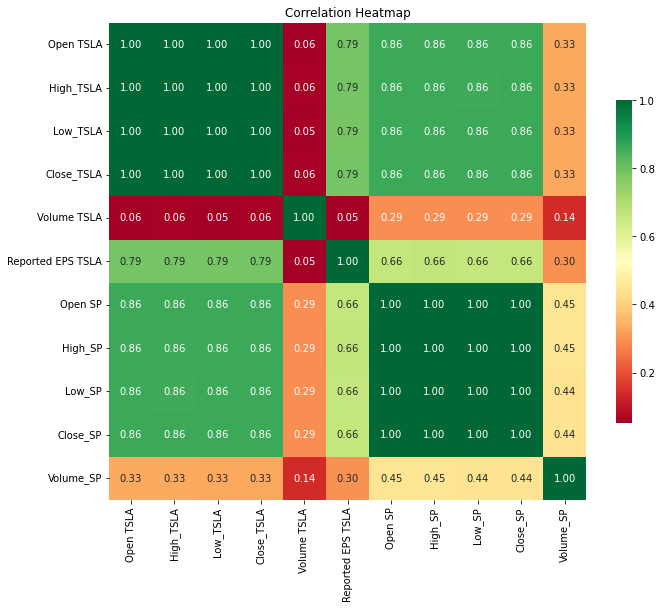

In [145]:
selected_data = pd.DataFrame({
    'Open TSLA': df_TSLA['Open'],
    'High_TSLA': df_TSLA['High'],
    'Low_TSLA': df_TSLA['Low'],
    'Close_TSLA': df_TSLA['Close'],
    'Volume TSLA': df_TSLA['Volume'],
    'Reported EPS TSLA': df_TSLA['Reported EPS'],
    'Open SP': df_SP['Open'],
    'High_SP': df_SP['High'],
    'Low_SP': df_SP['Low'],
    'Close_SP': df_SP['Close'],
    'Volume_SP': df_SP['Volume']
})

# calculate correlation matrix
corr = selected_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='RdYlGn', cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 3. Correlation with S&P500

In [137]:
import yfinance as yf

# Define the ticker symbol and end date
ticker = "^GSPC"
start_date = '1996-04-17'
end_date = "2022-12-31"

# Fetch the historical data using yfinance with start=None
df_SP = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [138]:
df_SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-04-17,645.000000,645.000000,638.710022,641.609985,641.609985,465200000
1996-04-18,641.609985,644.659973,640.760010,643.609985,643.609985,415150000
1996-04-19,643.609985,647.320007,643.609985,645.070007,645.070007,435690000
1996-04-22,645.070007,650.909973,645.070007,647.890015,647.890015,395370000
1996-04-23,647.890015,651.590027,647.700012,651.580017,651.580017,452690000


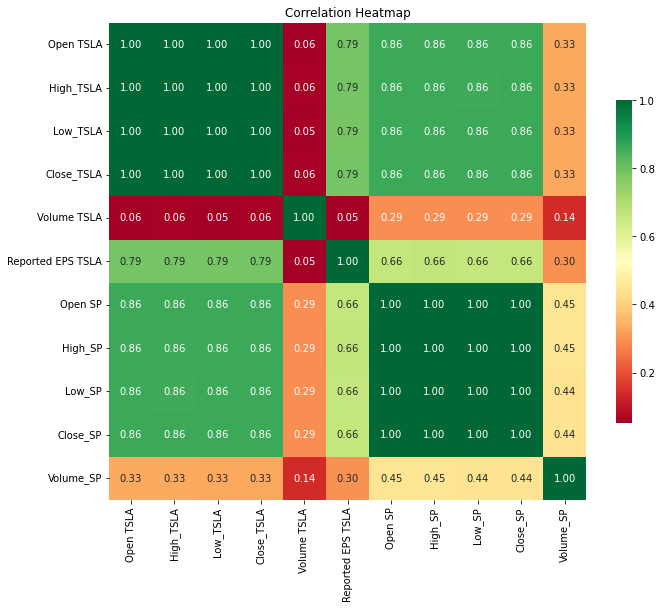

In [144]:
selected_data = pd.DataFrame({
    'Open TSLA': df_TSLA['Open'],
    'High_TSLA': df_TSLA['High'],
    'Low_TSLA': df_TSLA['Low'],
    'Close_TSLA': df_TSLA['Close'],
    'Volume TSLA': df_TSLA['Volume'],
    'Reported EPS TSLA': df_TSLA['Reported EPS'],
    'Open SP': df_SP['Open'],
    'High_SP': df_SP['High'],
    'Low_SP': df_SP['Low'],
    'Close_SP': df_SP['Close'],
    'Volume_SP': df_SP['Volume']
})

# calculate correlation matrix
corr = selected_data.corr()

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap='RdYlGn', cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

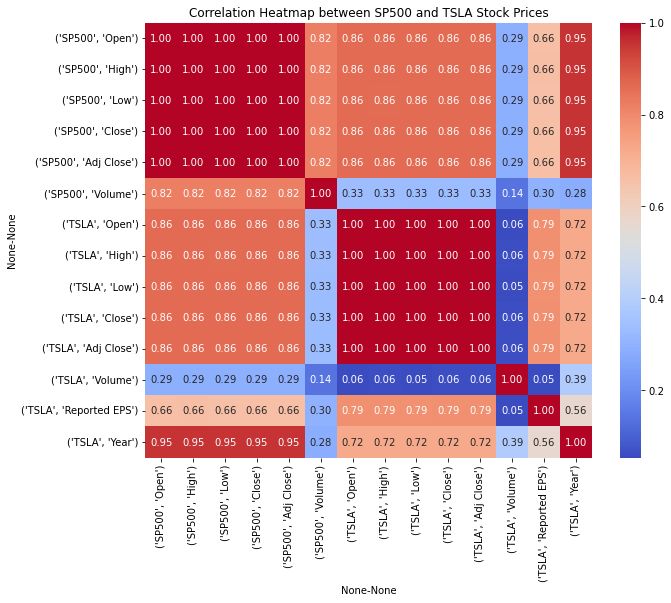

In [76]:
# Create a combined dataframe
df_combined = pd.concat([df_SP, df_TSLA], keys=['SP500', 'TSLA'], axis=1)

# Compute the correlation matrix
correlation_matrix = df_combined.corr()

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values)
plt.title('Correlation Heatmap between SP500 and TSLA Stock Prices')
plt.show()